In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,PReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = r"C:\Users\pavani\OneDrive\Pictures\drowsiness dataset\train11\train"

In [3]:
valid_data = r"C:\Users\pavani\OneDrive\Pictures\drowsiness dataset\train11\val"

In [4]:
training_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2)

In [5]:
valid_gen = ImageDataGenerator(rescale=1.0/255,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2)

In [6]:
training_data=training_gen.flow_from_directory(train_data,target_size=(60,60),
                                                                 batch_size=32,class_mode='binary')

Found 3200 images belonging to 2 classes.


In [7]:
validation_data = valid_gen.flow_from_directory(valid_data,target_size=(60,60),
                                               batch_size=32,class_mode='binary')

Found 800 images belonging to 2 classes.


In [8]:
training_data.class_indices

{'Closed_Eyes': 0, 'Open_Eyes': 1}

In [9]:
validation_data.class_indices

{'Closed_Eyes': 0, 'Open_Eyes': 1}

In [11]:
cnn= keras.models.Sequential([
                             keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=[60,60,3]),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
                             keras.layers.Conv2D(filters=64,kernel_size=3),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
                             keras.layers.Conv2D(filters=128,kernel_size=3),
                             keras.layers.MaxPooling2D(pool_size=(2,2)),
    
                             keras.layers.Dropout(0.5),
                             keras.layers.Flatten(),
                             keras.layers.Dense(units=128,activation='PReLU'),
                             keras.layers.Dropout(0.1),
                             keras.layers.Dense(units=256,activation='PReLU'),
                             keras.layers.Dropout(0.25),
                             keras.layers.Dense(units=1,kernel_regularizer=keras.regularizers.l2(0.01),activation='sigmoid')
])

In [12]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
cnn.fit(training_data,epochs=10,verbose=1,validation_data=validation_data)

Epoch 1/10
100/100 [==============================] - 16s 148ms/step - loss: 0.4883 - accuracy: 0.7422 - val_loss: 0.3247 - val_accuracy: 0.8800
Epoch 2/10
100/100 [==============================] - 9s 91ms/step - loss: 0.2899 - accuracy: 0.8834 - val_loss: 0.2205 - val_accuracy: 0.9150
Epoch 3/10
100/100 [==============================] - 9s 94ms/step - loss: 0.2187 - accuracy: 0.9166 - val_loss: 0.1636 - val_accuracy: 0.9400
Epoch 4/10
100/100 [==============================] - 9s 94ms/step - loss: 0.1783 - accuracy: 0.9334 - val_loss: 0.1357 - val_accuracy: 0.9538
Epoch 5/10
100/100 [==============================] - 10s 97ms/step - loss: 0.1937 - accuracy: 0.9247 - val_loss: 0.1164 - val_accuracy: 0.9588
Epoch 6/10
100/100 [==============================] - 10s 99ms/step - loss: 0.1204 - accuracy: 0.9591 - val_loss: 0.0886 - val_accuracy: 0.9663
Epoch 7/10
100/100 [==============================] - 10s 95ms/step - loss: 0.1128 - accuracy: 0.9634 - val_loss: 0.0793 - val_accuracy: 0

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)       

In [10]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten
from glob import glob # this libray is used to display the number of classes  in the dataset
from keras.models import Model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np

In [14]:
image_size= [60,60,3]

In [15]:
vgg16 = VGG16(input_shape=image_size,weights='imagenet',include_top=False)

In [16]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [18]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 60, 60, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 60, 60, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 30, 30, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 30, 30, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 30, 30, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 15, 15, 128)       0     

In [16]:
vgg16.trainable = False # to stop the activation of vweights and output layer display of that pretrained model

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [175]:
hist = model.fit(training_data,epochs=10,validation_data=validation_data,callbacks=[callbacks])

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987
Epoch 1: saving model to newdrowsinessvggl6model.hdf5
100/100 [==============================] - 133s 1s/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 8.5844e-04 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 2: saving model to newdrowsinessvggl6model.hdf5
100/100 [==============================] - 204s 2s/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9794
Epoch 3: saving model to newdrowsinessvggl6model.hdf5
100/100 [==============================] - 212s 2s/step - loss: 0.0760 - accuracy: 0.9794 - val_loss: 0.0154 - val_accuracy: 0.9975
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.3270 - accuracy: 0.8603 
Epoch 4: saving model to newdrowsinessvggl6model.hdf5

In [176]:
import cv2

In [177]:
test_img = cv2.imread(r"C:\Users\pavani\OneDrive\Pictures\drowsiness dataset\train\val\Closed_Eyes\s0037_00268_1_0_0_0_0_01.png")

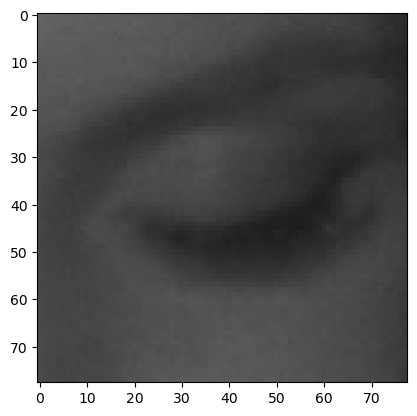

In [178]:
plt.imshow(test_img)

In [179]:
test_img.shape

(78, 78, 3)

In [180]:
test_imgre = cv2.resize(test_img,(60,60))

In [181]:
test_reshape = test_imgre.reshape((1,60,60,3))

In [182]:
res = model.predict(test_reshape)

1/1 [==============================] - 0s 49ms/step


In [183]:
res[0][0]

0.0

In [184]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [185]:
callbacks = ModelCheckpoint('newdrowsinessvggl6model.hdf5',monitor='val_acc',verbose=1)

In [186]:
model.save_weights('newdrowsinessvgg16model.hdf5')

In [187]:
model.save('newdrowsinessvgg16model.hdf5',save_format='hdf5')